In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import scipy.stats as stats

In [2]:
data_xrp = pd.read_csv(r'/Users/khoanguyen/Downloads/XRP-Historical-Data.csv')
data_xrp

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,0.3159,0.3141,0.3238,0.3120,444.26,0.56%
1,2019-03-02,0.3141,0.3159,0.3182,0.3105,286.01,-0.56%
2,2019-03-03,0.3111,0.3141,0.3154,0.3089,273.79,-0.97%
3,2019-03-04,0.3025,0.3111,0.3121,0.2979,328.22,-2.76%
4,2019-03-05,0.3151,0.3025,0.3179,0.3013,391.02,4.19%
...,...,...,...,...,...,...,...
1914,2024-05-28,0.5286,0.5339,0.5353,0.5218,451.13,-0.99%
1915,2024-05-29,0.5237,0.5286,0.5329,0.5201,501.98,-0.93%
1916,2024-05-30,0.5186,0.5237,0.5282,0.5132,533.93,-0.97%
1917,2024-05-31,0.5175,0.5186,0.5247,0.5129,487.46,-0.21%


In [3]:
# Convert the 'Date' column to datetime format
data_xrp['Date'] = pd.to_datetime(data_xrp['Date'])
data_xrp=data_xrp.set_index('Date')

# Set the 'Date' column as the index value
data_xrp.drop(['Open'], axis=1, inplace=True)
data_xrp.drop('High', axis=1, inplace=True)
data_xrp.drop('Low', axis=1, inplace=True)
data_xrp.drop('Vol.', axis=1, inplace=True)
data_xrp.drop('Change %', axis=1, inplace=True)
data_xrp.head

<bound method NDFrame.head of              Price
Date              
2019-03-01  0.3159
2019-03-02  0.3141
2019-03-03  0.3111
2019-03-04  0.3025
2019-03-05  0.3151
...            ...
2024-05-28  0.5286
2024-05-29  0.5237
2024-05-30  0.5186
2024-05-31  0.5175
2024-06-01  0.5185

[1919 rows x 1 columns]>

<Figure size 2000x800 with 0 Axes>

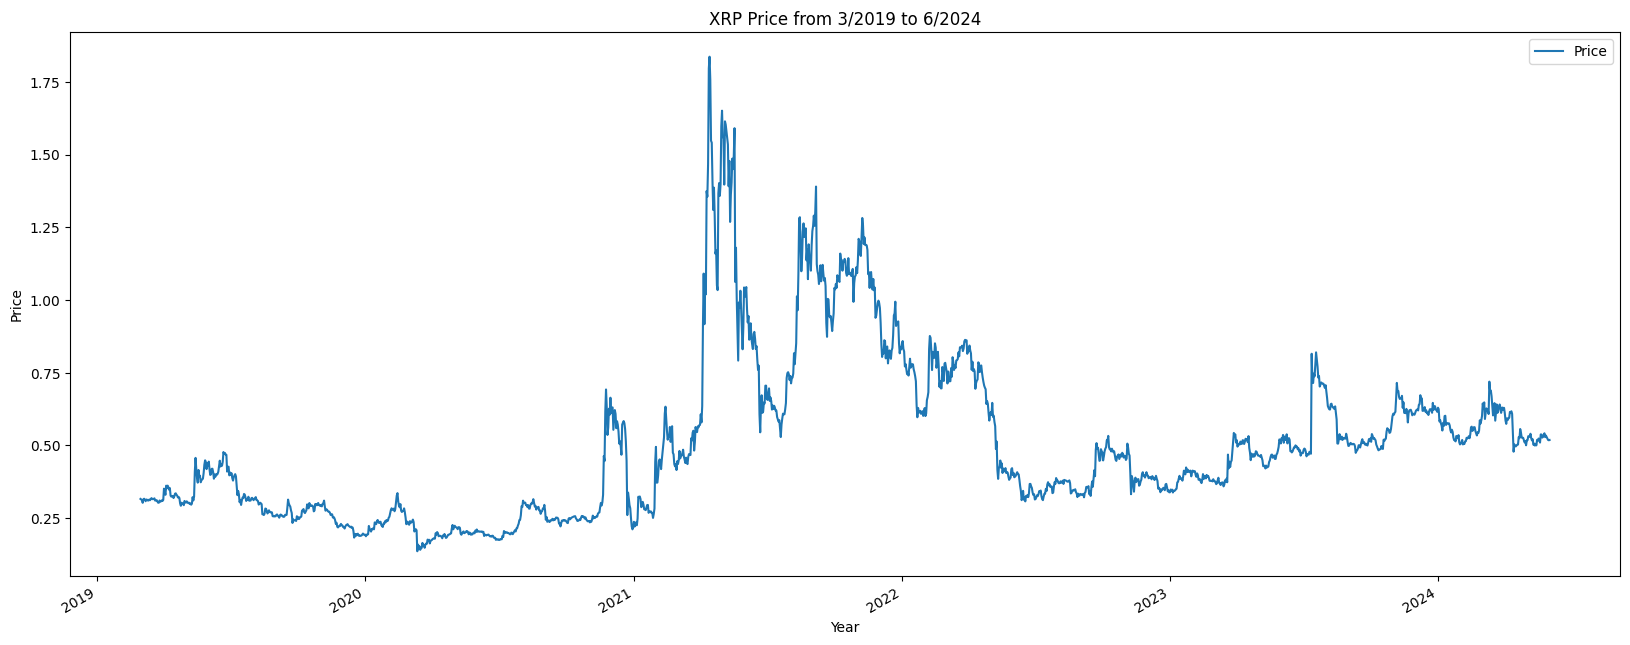

In [4]:
# Plot the XRP prices over time
plt.figure(figsize=(20,8))
data_xrp.plot(figsize=(20,8))
plt.title('XRP Price from 3/2019 to 6/2024')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

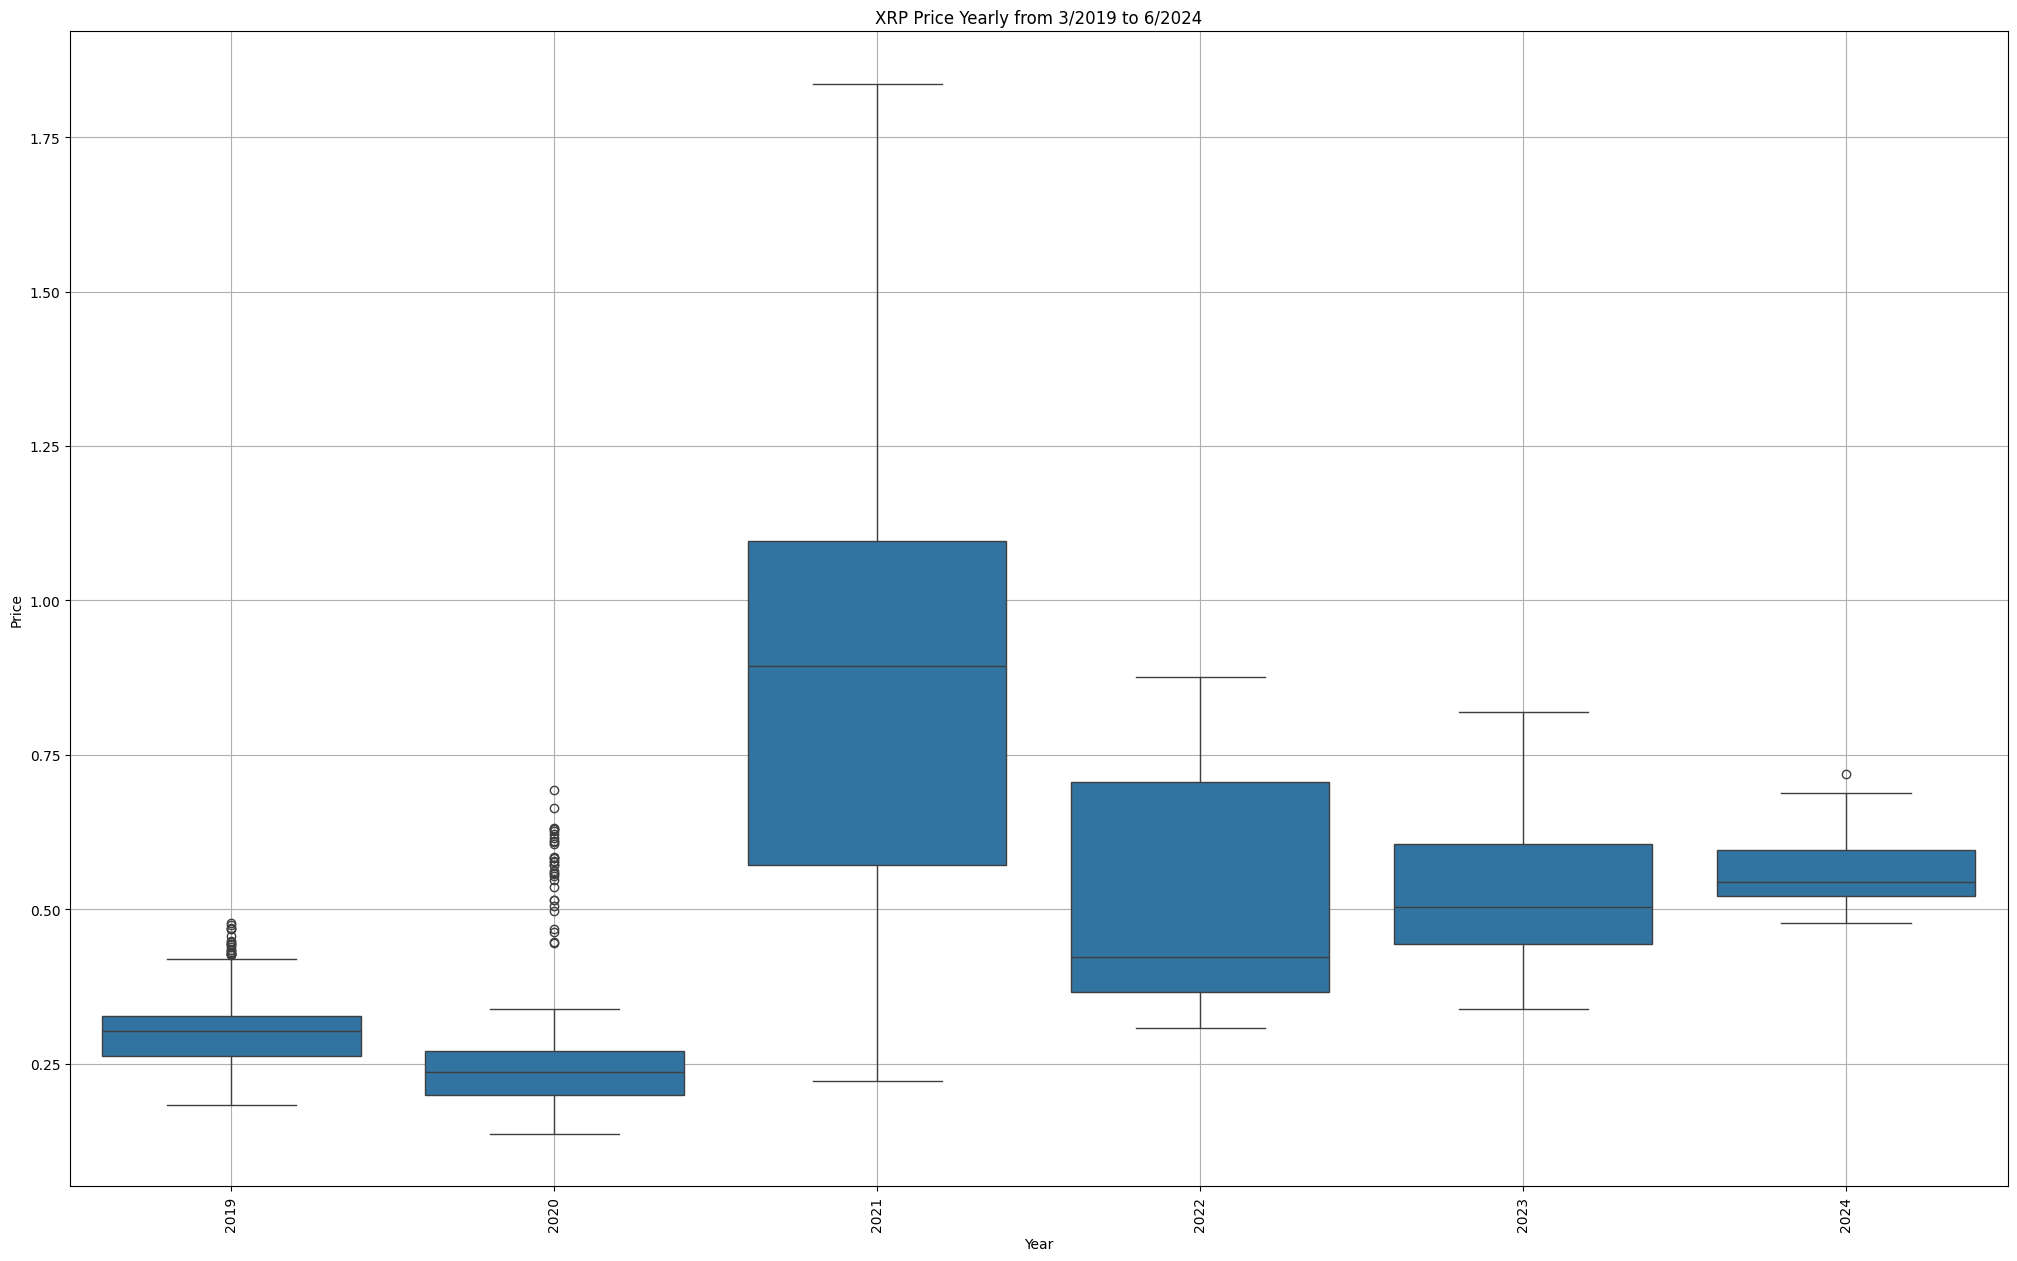

In [5]:
# Create a boxplot of the XRP prices by year
import seaborn as sns
plt.figure(figsize=(25,15))
sns.boxplot(x=data_xrp.index.year, y=data_xrp.values[:,0])
plt.title('XRP Price Yearly from 3/2019 to 6/2024')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [6]:
# Show summary statistics of the XRP prices
print("Summary statistics of XRP prices:\n", data_xrp.describe())

Summary statistics of XRP prices:
              Price
count  1919.000000
mean      0.502238
std       0.278059
min       0.136000
25%       0.298850
50%       0.447300
75%       0.615100
max       1.836300


/var/folders/sf/zln9yp7n1xg87dwwn79dp3680000gn/T/ipykernel_77109/340872907.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_xrp_yearly_sum = data_xrp.resample('A').mean()
/var/folders/sf/zln9yp7n1xg87dwwn79dp3680000gn/T/ipykernel_77109/340872907.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data_xrp_quarterly_sum = data_xrp.resample('Q').mean()


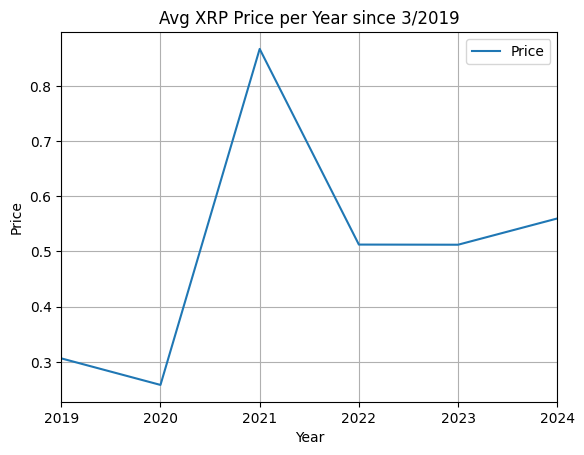

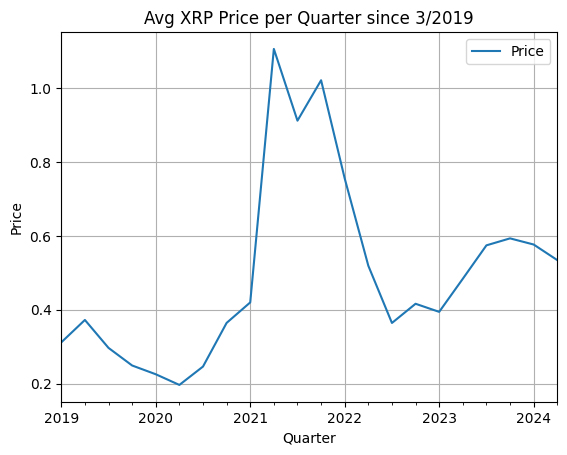

In [7]:
# Create yearly, quarterly, and decade summaries of the data
data_xrp_yearly_sum = data_xrp.resample('A').mean()
data_xrp_yearly_sum.plot()
plt.title('Avg XRP Price per Year since 3/2019')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

data_xrp_quarterly_sum = data_xrp.resample('Q').mean()
data_xrp_quarterly_sum.plot()
plt.title('Avg XRP Price per Quarter since 3/2019')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()

The first few rows of the coefficient of variation data:
          Mean       Std  Cov_pct
Date                             
2019  0.306279  0.064816    21.16
2020  0.258184  0.104928    40.64
2021  0.867024  0.349002    40.25
2022  0.512496  0.180572    35.23
2023  0.512237  0.101357    19.79


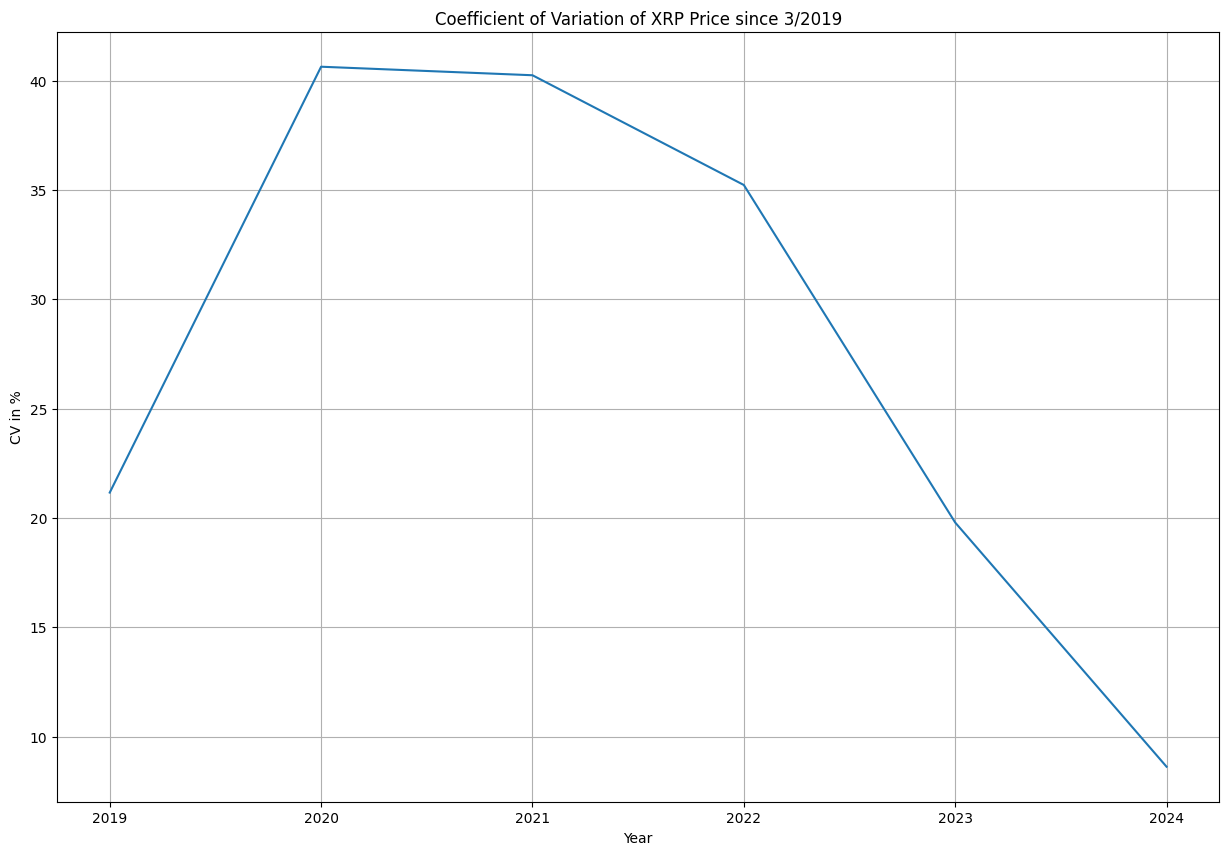

In [8]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
data_xrp_1 = data_xrp.groupby(data_xrp.index.year).mean().rename(columns={'Price':'Mean'})
data_xrp_1 = data_xrp_1.merge(data_xrp.groupby(data_xrp.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
data_xrp_1['Cov_pct'] = ((data_xrp_1['Std'] / data_xrp_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
data_xrp_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of XRP Price since 3/2019')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(data_xrp_1.head())